In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init() # H2Oサーバーの初期化

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 56 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_inaba_pmug4e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.23 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


# Regional Variability

In [4]:
# データの読み込み
# data = h2o.import_file('EDA_10.csv')
# data = h2o.import_file('EDA_20.csv')
data = h2o.import_file('EDA_Regional_100.csv')

# トレーニングデータとテストデータに分割
train, test = data.split_frame(ratios=[0.8])

data

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


moving_C_rate_var,moving_rich_area_C_rate_var,moving_poor_area_C_rate_var,moving_std_degree_var,moving_nodes_above_8_var,moving_nodes_above_10_var,prior_C_rate,prior_rich_C_rate,prior_poor_C_rate,mean_C_rate,mean_rich_C_rate,mean_poor_C_rate,mean_std_degree,mean_hub8_count,mean_hub10_count,pn_mean_var,pn_sum_var,pn_max_var,param_mean1,param_mean2,param_mean3,param_mean4,param_mean5,param_mean6,param_prior1,param_prior2,param_prior3,param_prior4,param_prior5,param_prior6
0.116667,0.116667,0.116667,0.100244,1.2381,0.428571,0.04,0.04,0.04,0.107525,0.10099,0.110099,2.10801,7.33663,1.79208,8.05051,89,16,79.4303,80.0119,79.2012,7.18488,7.23748,7.16415,85.44,85.44,85.44,7.72848,7.72848,7.72848
0.114762,0.114762,0.114762,0.121684,1.38095,0.52381,0.02,0.04,0,0.10901,0.102178,0.111683,2.10408,7.34653,1.75248,8.14141,74,16,65.9333,66.4388,65.7354,7.25392,7.30954,7.23216,72.52,71.04,74,7.97859,7.81576,8.14141
0.112381,0.112381,0.112381,0.100755,1.42857,0.285714,0.03,0.04,0,0.110594,0.103762,0.113663,2.10733,7.36634,1.77228,8.10101,70,16,62.2584,62.7366,62.0436,7.20509,7.26043,7.18022,67.9,67.2,70,7.85798,7.77697,8.10101
0.11,0.11,0.11,0.0668995,1.2381,-0.0952381,0.04,0.04,0.04,0.112277,0.106139,0.115644,2.10953,7.36634,1.78218,8.20202,80,16,71.0178,71.5089,70.7485,7.28112,7.33147,7.25351,76.8,76.8,76.8,7.87394,7.87394,7.87394
0.108095,0.108095,0.108095,0.0504758,0.952381,-0.047619,0.03,0.04,0,0.113861,0.107723,0.117624,2.11124,7.42574,1.76238,8.19192,79,16,70.005,70.4899,69.7077,7.25918,7.30946,7.22835,76.63,75.84,79,7.94616,7.86424,8.19192
0.105714,0.105714,0.105714,0.0383669,0.809524,-0.190476,0.02,0.04,0,0.115347,0.109307,0.118812,2.10733,7.40594,1.73267,8.23232,75,16,66.349,66.802,66.0891,7.28275,7.33247,7.25423,73.5,72,75,8.06768,7.90303,8.23232
0.100476,0.100476,0.100476,0.0429351,1.04762,-0.190476,0.03,0.04,0,0.117129,0.110099,0.12,2.10959,7.40594,1.74257,8.27273,71,16,62.6839,63.183,62.48,7.30375,7.36191,7.28,68.87,68.16,71,8.02455,7.94182,8.27273
0.0952381,0.0952381,0.0952381,0.0152911,0.857143,-0.428571,0.05,0.04,0.04,0.118812,0.111683,0.121584,2.11136,7.42574,1.75248,8.23232,43,16,37.8911,38.1976,37.7719,7.25423,7.31291,7.2314,40.85,41.28,41.28,7.82071,7.90303,7.90303
0.0895238,0.0895238,0.0895238,0.00155149,0.619048,-0.380952,0.04,0.04,0.08,0.120099,0.112475,0.122772,2.11438,7.46535,1.76238,8.33333,33,16,29.0367,29.2883,28.9485,7.33251,7.39604,7.31023,31.68,31.68,30.36,8,8,7.66667
0.0838095,0.0838095,0.0838095,-0.00383485,0.571429,-0.47619,0.05,0.04,0,0.121089,0.113663,0.123168,2.11394,7.46535,1.74257,8.37374,59,16,51.8557,52.2939,51.7331,7.35977,7.42195,7.34236,56.05,56.64,59,7.95505,8.03879,8.37374


In [5]:
data.columns

['moving_C_rate_var',
 'moving_rich_area_C_rate_var',
 'moving_poor_area_C_rate_var',
 'moving_std_degree_var',
 'moving_nodes_above_8_var',
 'moving_nodes_above_10_var',
 'prior_C_rate',
 'prior_rich_C_rate',
 'prior_poor_C_rate',
 'mean_C_rate',
 'mean_rich_C_rate',
 'mean_poor_C_rate',
 'mean_std_degree',
 'mean_hub8_count',
 'mean_hub10_count',
 'pn_mean_var',
 'pn_sum_var',
 'pn_max_var',
 'param_mean1',
 'param_mean2',
 'param_mean3',
 'param_mean4',
 'param_mean5',
 'param_mean6',
 'param_prior1',
 'param_prior2',
 'param_prior3',
 'param_prior4',
 'param_prior5',
 'param_prior6']

In [6]:
# 目的変数・説明変数の指定
target_vec = [
    'moving_C_rate_var',
    # 'moving_rich_area_C_rate_var',
    # 'moving_poor_area_C_rate_var',
    'moving_std_degree_var',
    'moving_nodes_above_8_var',
    'moving_nodes_above_10_var',
]
features_vec = [
    [
        'mean_C_rate',
        # 'mean_rich_C_rate',
        # 'mean_poor_C_rate',
        'mean_std_degree',
        'mean_hub8_count',
        'mean_hub10_count',
        'pn_mean_var',
        # 'pn_sum_var',
        # 'pn_max_var',
        # 'param_mean1',
        # 'param_mean2',
        # 'param_mean3',
        # 'param_mean4',
        # 'param_mean5',
        # 'param_mean6',
        # 'param_prior1',
        # 'param_prior2',
        # 'param_prior3',
        # 'param_prior4',
        # 'param_prior5',
        # 'param_prior6',
    ],
    # [
    #     'mean_C_rate',
    #     'mean_rich_C_rate',
    #     'mean_poor_C_rate',
    #     'mean_std_degree',
    #     'mean_hub8_count',
    #     'mean_hub10_count',
    #     'pn_mean_var',
    #     'pn_sum_var',
    #     'pn_max_var',
    #     'param_mean1',
    #     'param_mean2',
    #     'param_mean3',
    #     'param_mean4',
    #     'param_mean5',
    #     'param_mean6',
    #     # 'param_prior1',
    #     # 'param_prior2',
    #     # 'param_prior3',
    #     # 'param_prior4',
    #     # 'param_prior5',
    #     # 'param_prior6',
    # ],
    # [
    #     'prior_C_rate',
    #     'prior_rich_C_rate',
    #     'prior_poor_C_rate',
    #     # 'mean_C_rate',
    #     # 'mean_rich_C_rate',
    #     # 'mean_poor_C_rate',
    #     # 'mean_std_degree',
    #     # 'mean_hub8_count',
    #     # 'mean_hub10_count',
    #     'pn_mean_var',
    #     'pn_sum_var',
    #     'pn_max_var',
    #     # 'param_mean1',
    #     # 'param_mean2',
    #     # 'param_mean3',
    #     # 'param_mean4',
    #     # 'param_mean5',
    #     # 'param_mean6',
    #     'param_prior1',
    #     'param_prior2',
    #     'param_prior3',
    #     'param_prior4',
    #     'param_prior5',
    #     'param_prior6',
    # ],
];

target: moving_C_rate_var
features: ['mean_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'pn_mean_var']
AutoML progress: |
18:39:57.978: AutoML: XGBoost is not available; skipping it.

███████████████████████████Job request failed Unexpected HTTP error: ('Connection aborted.', BadStatusLine('GET /3/Jobs/$03017f00000132d4ffffffff$_809eab345be01185cef013e358fd4240 HTTP/1.1\r\n')), will retry after 3s.
████████████████████████████████████| (done) 100%
model_id                                          rmse        mse        mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_2_20240924_183957_model_28  0.106574  0.0113579  0.0716821  0.116029                 0.0113579
GBM_grid_1_AutoML_2_20240924_183957_model_25  0.110653  0.0122442  0.0744762  0.120704                 0.0122442
GBM_grid_1_AutoML_2_20240924_183957_model_19  0.111139  0.0123519  0.0754481  0.121084                 0.0123519
DRF_1_AutoML_2_20240924_183957                0.116295  0.0135244  0.07964

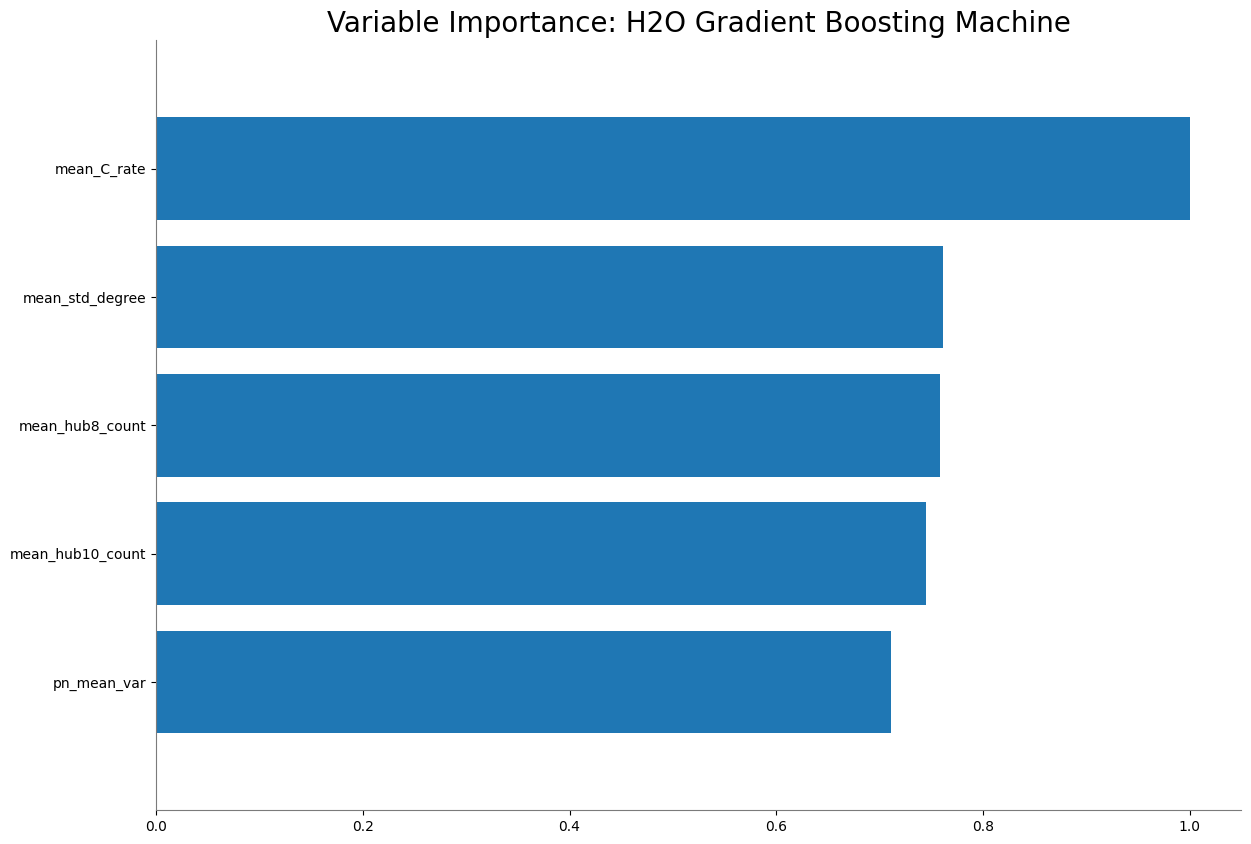

target: moving_std_degree_var
features: ['mean_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'pn_mean_var']
AutoML progress: |
18:49:59.461: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                           rmse         mse        mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_4_20240924_184959_model_66  0.0790803  0.0062537   0.0604771  0.0805444                0.0062537
GBM_grid_1_AutoML_4_20240924_184959_model_71  0.0791735  0.00626844  0.0600357  0.0805996                0.00626844
DRF_1_AutoML_4_20240924_184959                0.0805145  0.00648259  0.061584   0.0820288                0.00648259
GBM_grid_1_AutoML_4_20240924_184959_model_89  0.0805202  0.0064835   0.0618126  0.0820021                0.0064835
GBM_grid_1_AutoML_4_20240924_184959_model_83  0.0806122  0.00649833  0.0616683  0.0820613                0.00649833
XRT_1_AutoML_4_2024

<Figure size 640x480 with 0 Axes>

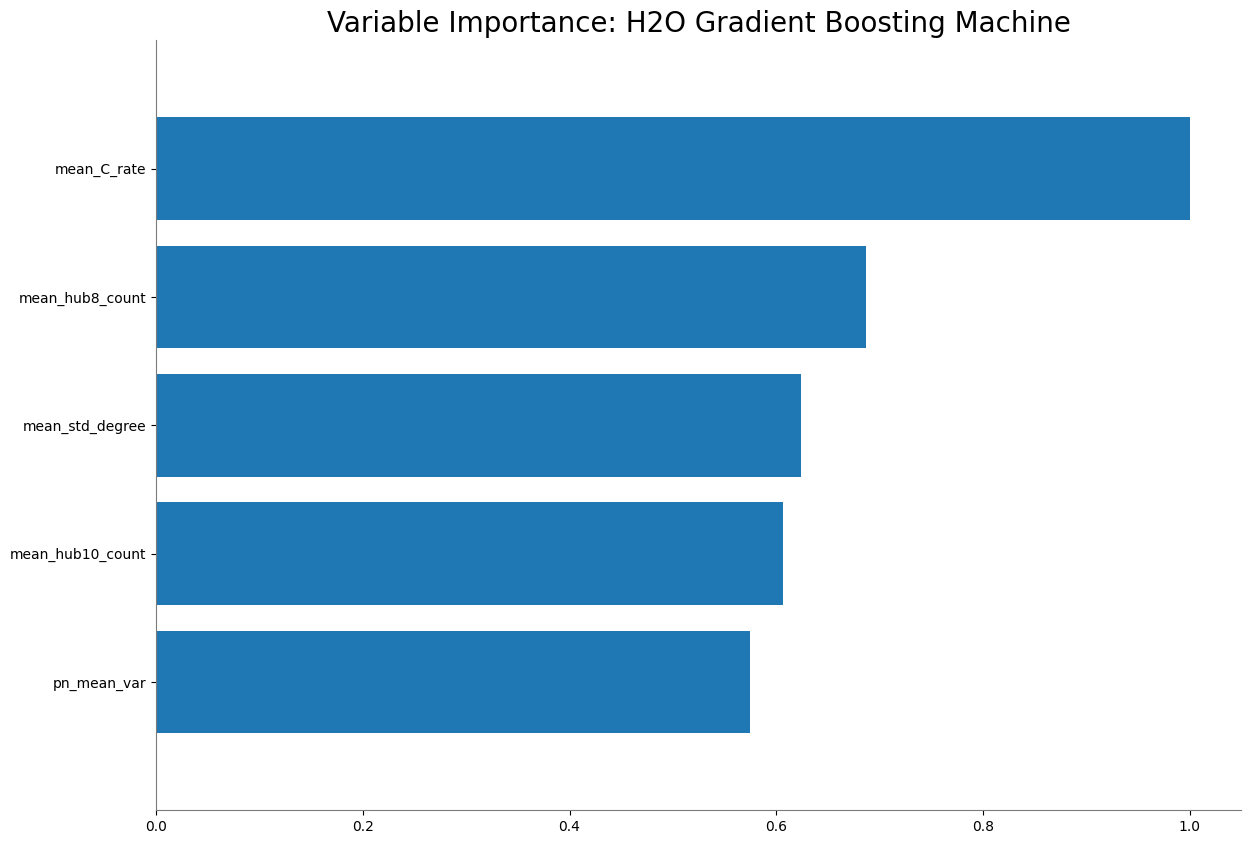

target: moving_nodes_above_8_var
features: ['mean_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'pn_mean_var']
AutoML progress: |
19:00:00.640: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                          rmse       mse       mae    rmsle    mean_residual_deviance
GBM_grid_1_AutoML_6_20240924_190000_model_13  0.568666  0.323381  0.430509      nan                  0.323381
GBM_grid_1_AutoML_6_20240924_190000_model_2   0.614339  0.377413  0.47267       nan                  0.377413
GBM_grid_1_AutoML_6_20240924_190000_model_32  0.637535  0.406451  0.494255      nan                  0.406451
GBM_grid_1_AutoML_6_20240924_190000_model_22  0.644331  0.415162  0.495749      nan                  0.415162
GBM_grid_1_AutoML_6_20240924_190000_model_35  0.658656  0.433828  0.510216      nan                  0.433828
DRF_1_AutoML_6_20240924_190000                0.66

<Figure size 640x480 with 0 Axes>

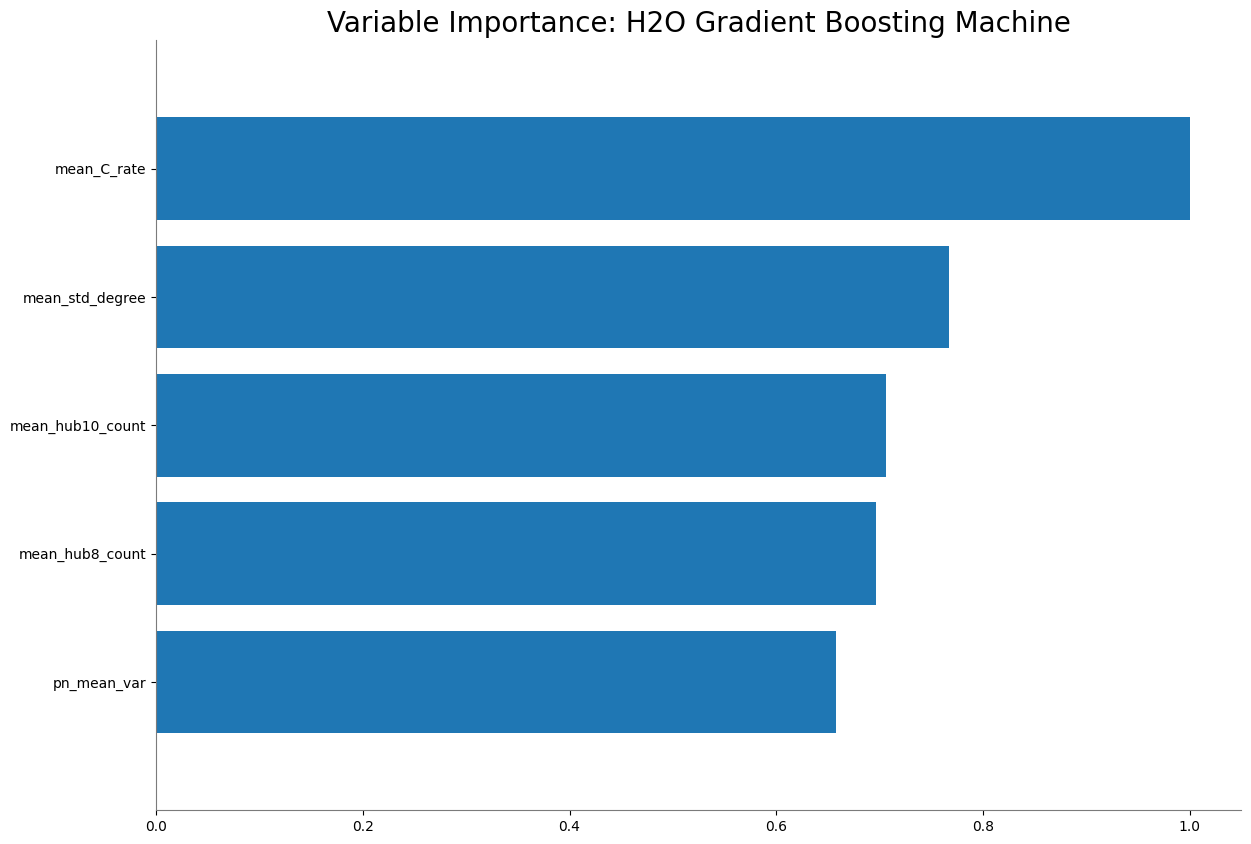

target: moving_nodes_above_10_var
features: ['mean_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'pn_mean_var']
AutoML progress: |
19:21:28.697: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                            rmse       mse      mae    rmsle    mean_residual_deviance
GLM_1_AutoML_7_20240924_192128  0.622617  0.387652  0.49541      nan                  0.387652
[1 row x 6 columns]

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.3848357582116609
RMSE: 0.6203513183766606
MAE: 0.49371433297799333
RMSLE: NaN
Mean Residual Deviance: 0.3848357582116609
R^2: 0.0005238239149784052
Null degrees of freedom: 19711
Residual degrees of freedom: 19706
Null deviance: 7591.091257609241
Residual deviance: 7585.882465868259
AIC: 37130.482305486075
r^2: 0.0005238239149784052


<Figure size 640x480 with 0 Axes>

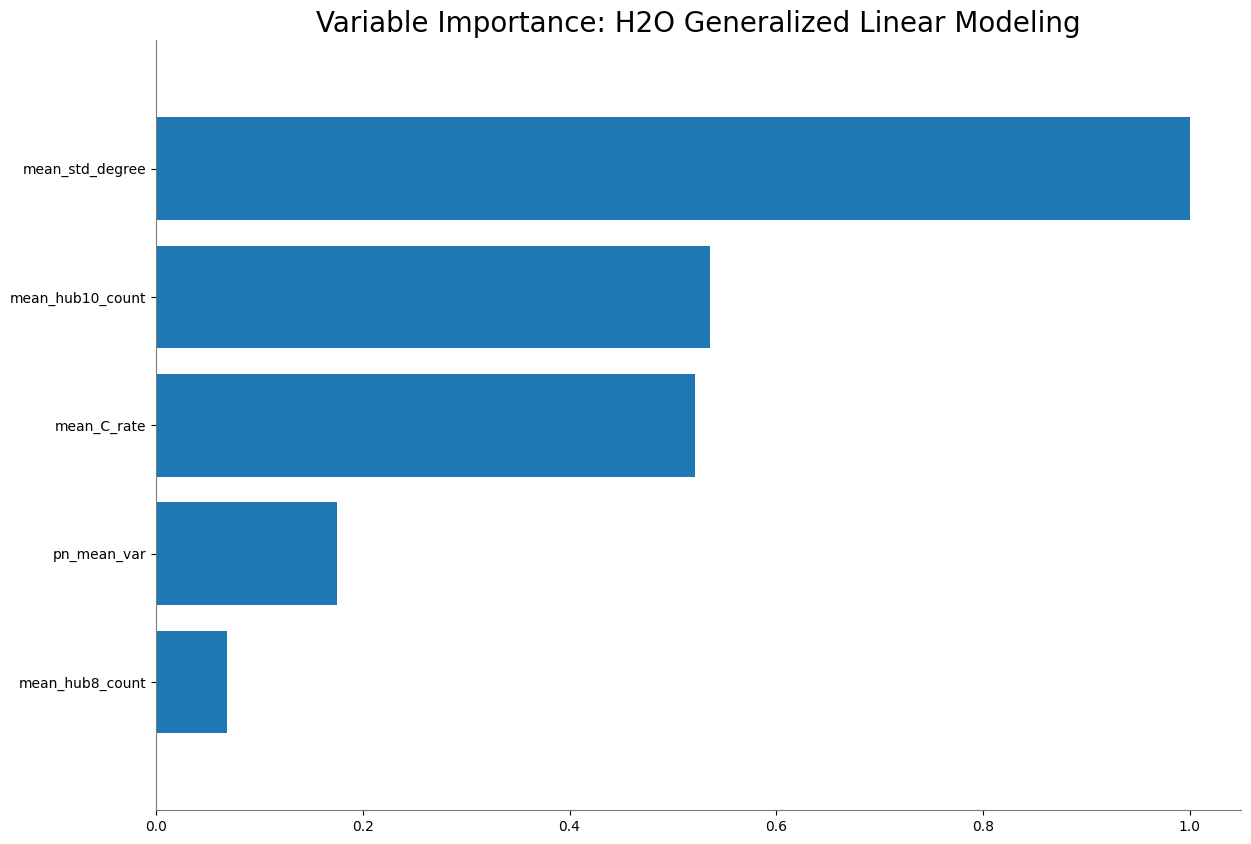

<Figure size 640x480 with 0 Axes>

In [7]:
model_list = []

for target in target_vec:
    for features in features_vec:
        print(f"target: {target}")
        print(f"features: {features}")

        # H2O AutoMLの設定
        aml = H2OAutoML(max_runtime_secs=600, exclude_algos=["StackedEnsemble"])

        # AutoMLの実行
        aml.train(x=features, y=target, training_frame=train)

        # リーダーボードの表示
        lb = aml.leaderboard
        print(lb)

        # 最適なモデルの取得
        best_model = aml.leader
        model_list.append(best_model)

        # テストデータでの評価
        perf = best_model.model_performance(test)
        print(perf)
        print(f"r^2: {perf.r2()}")

        # 変数重要度をプロット
        best_model.varimp_plot()

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


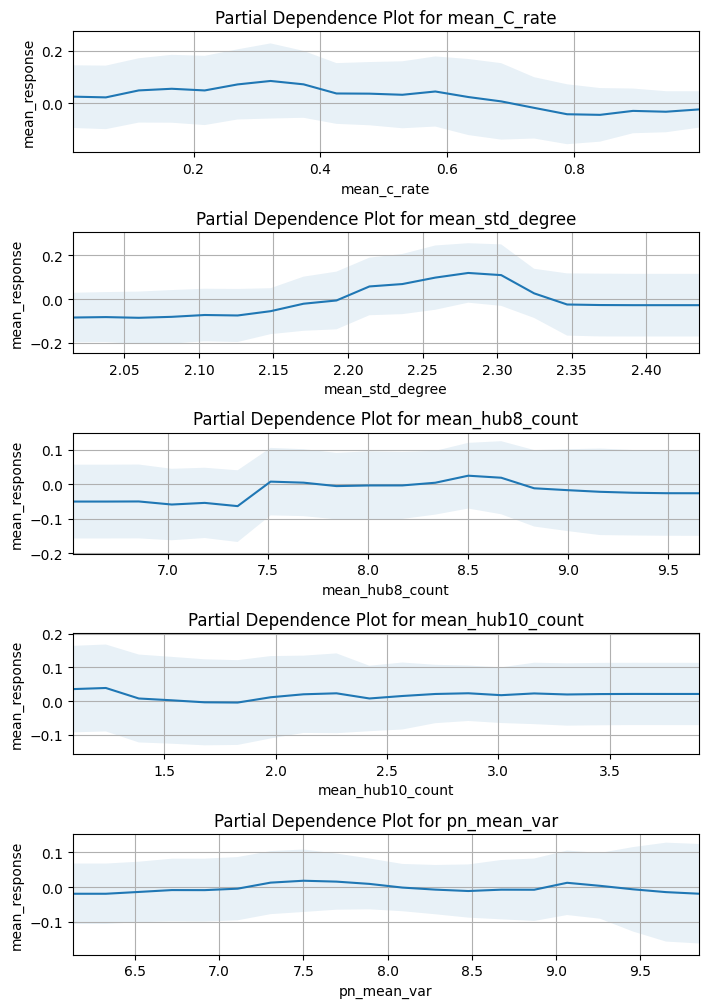

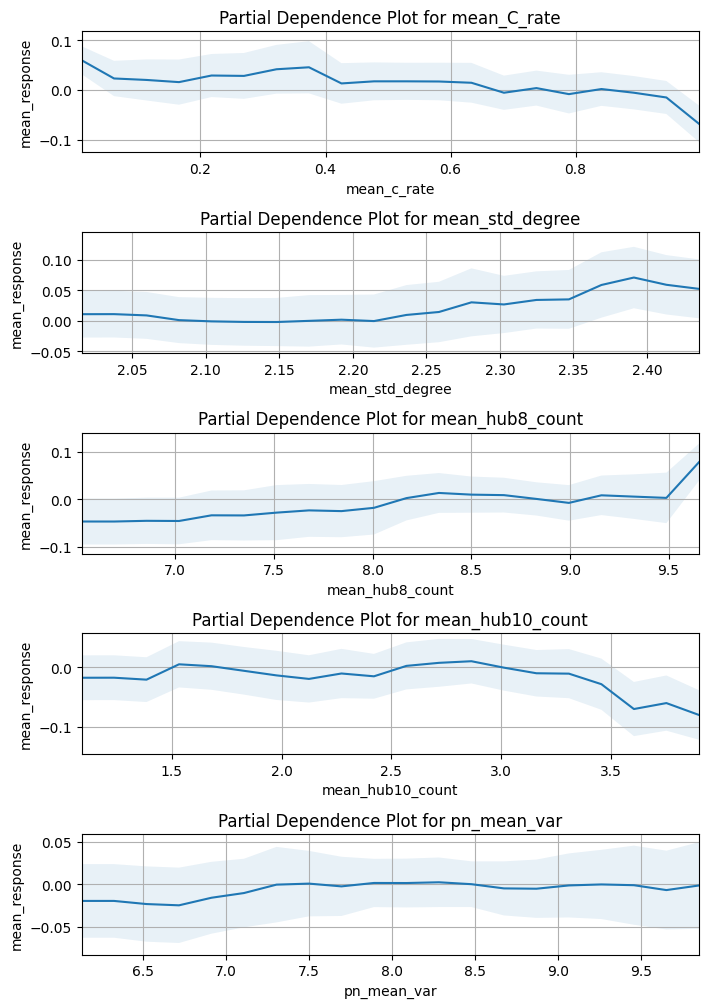

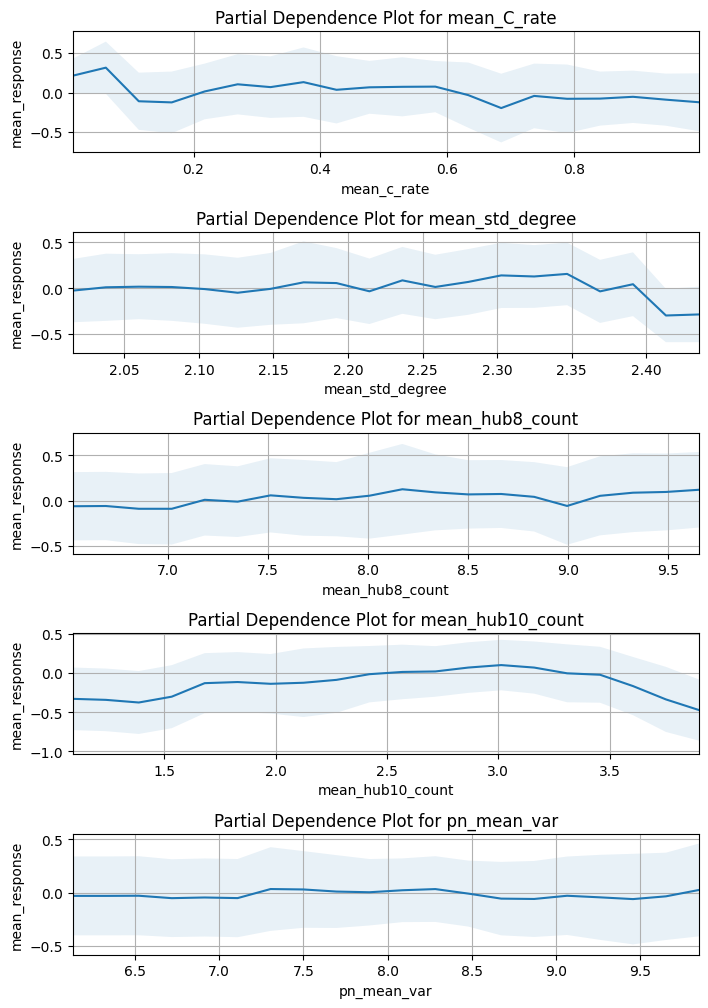

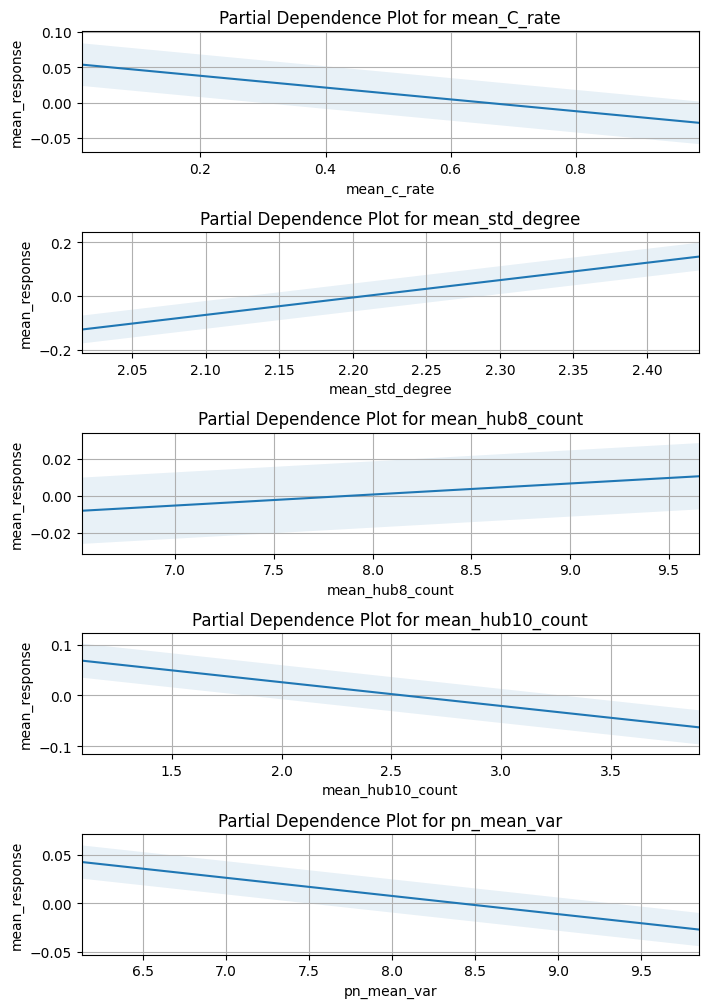

In [14]:
partial_plot_columns = ['mean_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'pn_mean_var']
for model in model_list:
    model.partial_plot(frame=test, cols=partial_plot_columns, plot=True)